# Objectives
YW
* scrape a website for relevant information, store that information to a dataframe and save that dataframe as a csv file
* load in a dataframe and do the following
    * calculate the zscores of a given column
    * calculate the zscores of a point from a given column in the dataframe
    * calculate and plot the pmf and cdf of another column

# Part 1 - Webscraping
* use the following url scrape the first page of results
* for each item get the name of the item
* store the names to a dataframe and save that dataframe to csv then display
    * store the dataframe in the `data` folder in the repo
    * name the file `part1.csv` and make sure that when you write it you set `index=False`
* the head of the dataframe

* it should match the following
<img src="solutions/images/part1.png"/>

In [233]:
import json
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kurtosis, skew

In [4]:
url = "https://www.petsmart.com/dog/treats/dental-treats/#page_name=flyout&category=dog&cta=dentaltreat"

In [9]:
# scrape the data
r = requests.get(url=url)

In [8]:
# status code
r.status_code

200

In [10]:
# view contents
r.content[0:1000]

b'\n<!doctype html>\n<!--[if lt IE 7]> <html class="ie6 oldie" lang="en"> <![endif]-->\n<!--[if IE 7]> <html class="ie7 oldie" lang="en"> <![endif]-->\n<!--[if IE 8]> <html class="ie8 oldie" lang="en"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en"> <!--<![endif]-->\n<head>\n<script>\ndataLayer =\n[{\n\'language\': \'en\',\n\'loginState\': false,\n\'pageName\':\'ps:\'productgridutils.getfirstparentname(pdict.productsearchresult.category):productgridutils.getsecondparentname(pdict.productsearchresult.category):dental-treats\',\n\'section\': \'productgridutils.getsecondparentname(pdict.productsearchresult.category)\',\n\'subSection\': \'productgridutils.getfirstparentname(pdict.productsearchresult.category)\',\n\n\n\n}];\n</script>\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n\'//www.googletagmanager.co

In [12]:
# no idea what this does
webpage_soup = BeautifulSoup(r.content, 'html.parser')

In [61]:
# retrieve a list of item names
result_list = webpage_soup.find_all("div",attrs={"class":"product-name"})

In [77]:
# create function that parses through each item and appends name to new list
def list_names(result_list):
    list_of_data = []
    for box in result_list:
        data = {}
        data['item'] = box.text.replace('\n','')
        list_of_data.append(data)
    return list_of_data

In [84]:
# load the data into a dataframe file
df = pd.DataFrame(list_names(result_list))

,item
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


In [37]:
# save the data as a csv file
df.to_csv('data/part1.csv',index=False)

In [85]:
# display df.head()
df.head()

,item
0,Greenies Regular Dental Dog Treats
1,Greenies Petite Dental Dog Treats
2,Greenies Large Dental Dog Treats
3,Pedigree Dentastix Large Dog Treats
4,Greenies 6 Month+ Puppy Petite Dental Dog Treats


# Part 2

load in the csv file located in the `data` folder called `part2.csv`

create a function that calculates the zscores of an array

then calculate the zscores for each column in part2.csv and add them as columns

See below for final result

<img src="solutions/images/part2_df_preview.png"/>

In [174]:
# import part 2 csv

salary = pd.read_csv('data/part2.csv')
salary.head()

,salaries,NPS Score,eventOutcome
0,44112.0,-7.0,1
1,46777.0,-12.0,2
2,50013.0,50.0,5
3,48983.0,-13.0,0
4,50751.0,-11.0,6


In [254]:
# create a function that calculates the zscores of an array

def zscore_list(file,column):
    mean = file[column].mean()
    std = file[column].std()
    return [(value - mean)/std for value in file[column]]

In [255]:
# calculate the zscore for each column and store them as a new column with the names used above

salary['salaries_zscores'] = zscore_list(salary,'salaries')
salary['NPS_Score_zscores'] = zscore_list(salary,'NPS Score')
salary['eventOutcome_zscores'] = zscore_list(salary,'eventOutcome')

In [256]:
salary.head()

,salaries,NPS Score,eventOutcome,salaries_zscores,NPS_Score_zscores,eventOutcome_zscores
0,44112.0,-7.0,1,-1.460155,-0.913522,-1.103166
1,46777.0,-12.0,2,-0.793981,-1.080668,-0.668095
2,50013.0,50.0,5,0.014926,0.991947,0.637118
3,48983.0,-13.0,0,-0.242545,-1.114097,-1.538237
4,50751.0,-11.0,6,0.199405,-1.047239,1.072189


# Part 3 
plot 'salaries' and 'NPS Score' on a subplot (1 row 2 columns) 
then repeat this for the zscores

see image below for reference
<img src="solutions/images/part2-plots.png"/>

Text(0.5, 0, 'NPS Scores')

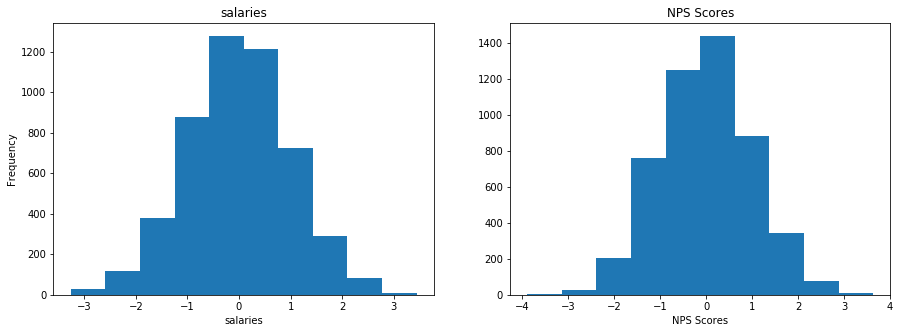

In [257]:
# plot for raw salaries and NPS Score data goes here
new_figure = plt.figure(figsize=(15,5))

ax = new_figure.add_subplot(121)
ax.hist(salary['salaries_zscores'],bins=10)
ax.set_title('salaries')
ax.set_xlabel('salaries')
ax.set_ylabel('Frequency')


ax2 = new_figure.add_subplot(122)
ax2.hist(salary['NPS_Score_zscores'],bins=10)
ax2.set_title('NPS Scores')
ax2.set_xlabel('NPS Scores')

Text(0.5, 0, 'NPS Scores')

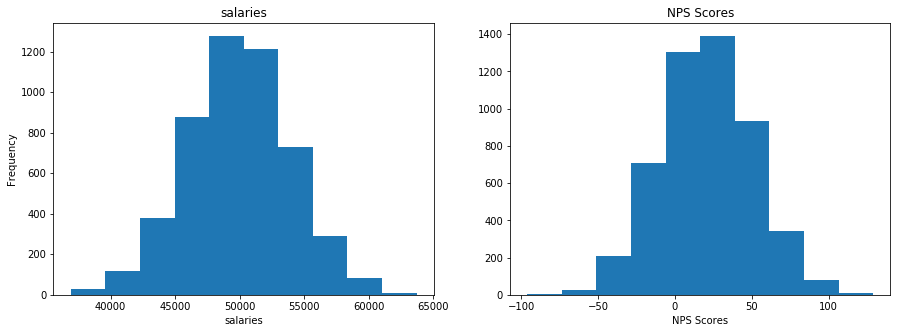

In [258]:
# plot for zscores for salaries and NPS Score data goes here
new_figure = plt.figure(figsize=(15,5))

ax = new_figure.add_subplot(121)
ax.hist(salary['salaries'],bins=10)
ax.set_title('salaries')
ax.set_xlabel('salaries')
ax.set_ylabel('Frequency')


ax2 = new_figure.add_subplot(122)
ax2.hist(salary['NPS Score'],bins=10)
ax2.set_title('NPS Scores')
ax2.set_xlabel('NPS Scores')

# Part 4 - PMF
using the column 'eventOutcomes'

create a PMF and plot the PMF as a bar chart

See image below for referenc

<img src="solutions/images/part4_pmf.png"/>

In [259]:
# create function to count each value of eventOutcome and add into PMF_dict, 
# for each value in PMF_dict, convert to probability

def PMF(file,column):
    PMF_dict = {}
    for value in file[column]:
        if value in PMF_dict:
            PMF_dict[value] += 1
        else:
            PMF_dict[value] = 1
            
    for k,v in PMF_dict.items():
        PMF_dict[k] = round(v/len(file[column]),2)
    return PMF_dict

converted_PMF = PMF(salary,'eventOutcome')
eventoutcome = [k for k in converted_PMF.keys()]
eventoutcome_prob = [v for v in converted_PMF.values()]

Text(0.5, 1.0, 'Event Outcome PMF')

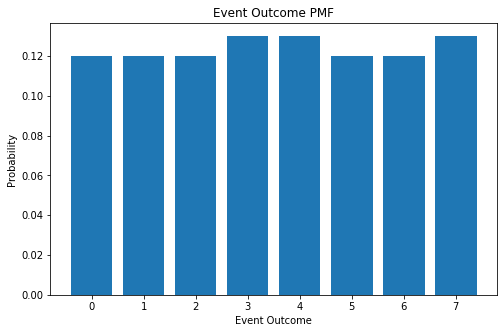

In [211]:
plt.figure(figsize=(8,5))

plt.bar(eventoutcome, eventoutcome_prob)
plt.xlabel('Event Outcome')
plt.ylabel('Probability')
plt.title('Event Outcome PMF')

# Part 5 - CDF
plot the CDF of Event Outcomes as a scatter plot using the information above

See image below for reference 

<img src="solutions/images/part5_cmf.png"/>

# Bonus:
* using np.where find salaries with zscores <= -2.0

* calculate the skewness and kurtosis for the NPS Score column

In [253]:
# find salaries with zscores <= 2.0

zscores_greater_negative2 = np.where(salary['salaries_zscores'] <= -2.0)
zscores_greater_negative2

(array([  20,   41,   89,  107,  285,  286,  291,  303,  338,  399,  408,
         411,  415,  445,  454,  489,  554,  570,  640,  658,  687,  690,
         746,  767,  781,  784,  792,  839,  873,  915,  962,  977, 1049,
        1113, 1124, 1173, 1184, 1197, 1221, 1246, 1303, 1306, 1312, 1337,
        1344, 1360, 1526, 1565, 1626, 1646, 1763, 1764, 1879, 1931, 1958,
        1966, 1983, 2013, 2025, 2052, 2161, 2314, 2356, 2391, 2396, 2452,
        2622, 2630, 2640, 2685, 2731, 2802, 2888, 2894, 2908, 2965, 2982,
        3036, 3129, 3173, 3262, 3287, 3292, 3293, 3317, 3379, 3432, 3445,
        3496, 3546, 3582, 3646, 3656, 3708, 3709, 3761, 3918, 3953, 4018,
        4038, 4062, 4116, 4122, 4155, 4158, 4168, 4174, 4181, 4211, 4276,
        4308, 4341, 4346, 4448, 4458, 4506, 4528, 4571, 4692, 4707, 4731,
        4765, 4949]),)

In [252]:
# calculate skewness and kurtosis of NPS Score column

skewness = skew(salary['NPS Score'])

#not sure why i'm getting an error...
kurtosis = kurtosis(salary['NPS Score'])

TypeError: 'float' object is not callable

# run the cell below to convert your notebook to a README for assessment

In [ ]:
!jupyter nbconvert --to markdown assessment.ipynb && mv assessment.md README.md